In [2]:
ord('С')%5

2

In [3]:
import pandas as pd
import sklearn as sk
import sklearn.datasets as ds
import sklearn.cluster as cl
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')

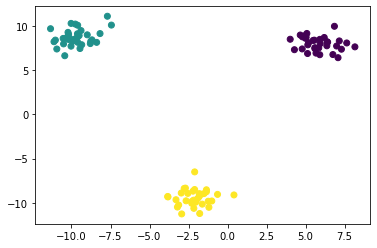

In [4]:
x,y = ds.make_blobs()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

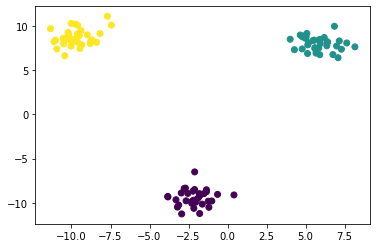

In [5]:
ypred = cl.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

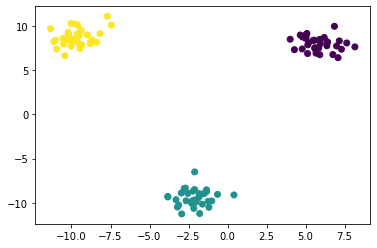

In [6]:
ypred = cl.AgglomerativeClustering(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

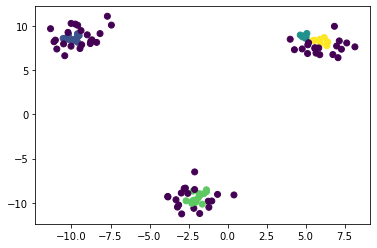

In [7]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

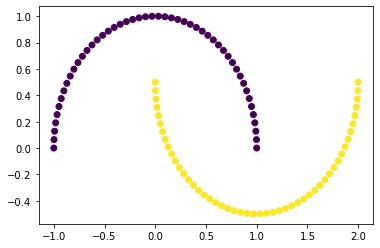

In [8]:
x,y = data = ds.make_moons()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

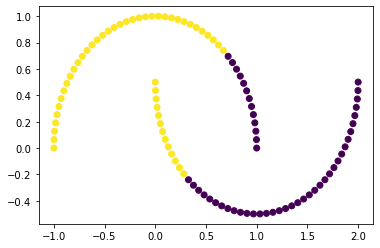

In [9]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

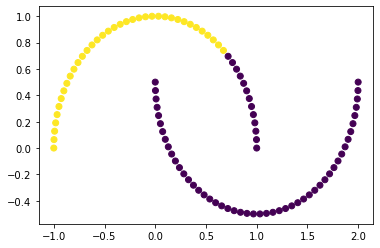

In [10]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

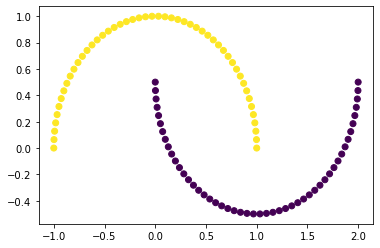

In [11]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

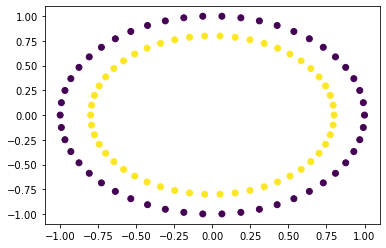

In [12]:
x,y = data = ds.make_circles()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

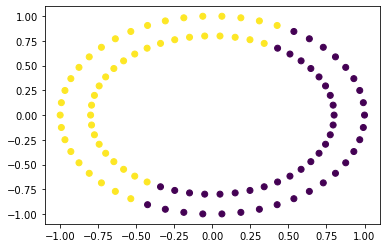

In [13]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

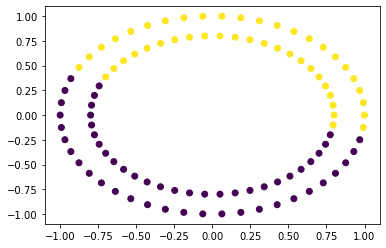

In [14]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

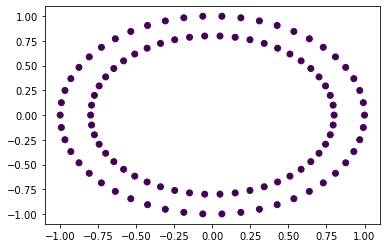

In [15]:
ypred = cl.DBSCAN(eps=0.18).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

In [16]:
data = pd.read_csv('mushrooms.csv')
data.head()
# отделим целевой параметр
x = data.iloc[:,1:]
y = data.iloc[:,:1]
# закодируем все наши категориальные параметры
LE = sk.preprocessing.LabelEncoder()
for i in x.columns:
    x.loc[:,i] = LE.fit_transform(x.loc[:,i])
y = LE.fit_transform(y)

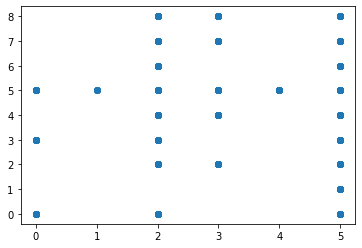

In [17]:
plt.scatter(x.iloc[:,0], x.iloc[:,4])

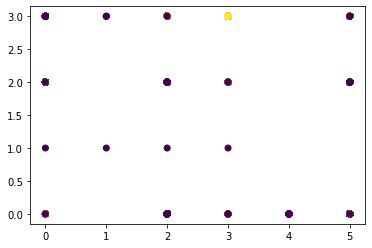

In [18]:
cluster = cl.KMeans(n_clusters=2)
ypred = cluster.fit_predict(x)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ypred)

(array([ 104.,  211.,  724., 1251., 1364., 1455., 1267.,  200.,  436.,
        1112.]),
 array([-0.1267334 , -0.05109208,  0.02454923,  0.10019055,  0.17583187,
         0.25147319,  0.32711451,  0.40275583,  0.47839715,  0.55403847,
         0.62967979]),
 <BarContainer object of 10 artists>)

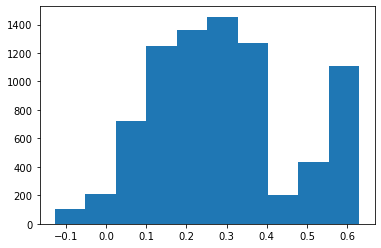

In [19]:
plt.hist(sk.metrics.silhouette_samples(x,ypred))

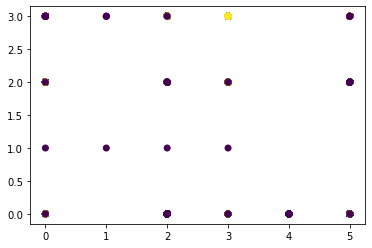

In [20]:
cluster = cl.AgglomerativeClustering(n_clusters=2)
ypred = cluster.fit_predict(x)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ypred)

(array([  80.,  191.,  762., 1280., 1344., 1434., 1284.,  197.,  436.,
        1116.]),
 array([-0.12421884, -0.04953529,  0.02514825,  0.0998318 ,  0.17451535,
         0.24919889,  0.32388244,  0.39856599,  0.47324953,  0.54793308,
         0.62261663]),
 <BarContainer object of 10 artists>)

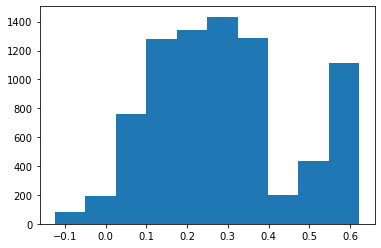

In [21]:
plt.hist(sk.metrics.silhouette_samples(x,ypred))

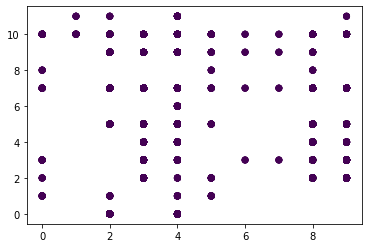

In [22]:
cluster = cl.DBSCAN()
ypred = cluster.fit_predict(x)
plt.scatter(x.iloc[:,2],x.iloc[:,8],c=ypred)

In [24]:
plt.hist(sk.metrics.silhouette_samples(x,ypred))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)